Invoke-WebRequest -Uri "https://www.scss.tcd.ie/Doug.Leith/CSU44061/week4.php" -OutFile "week4_2.csv"

In [1]:
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.dummy import DummyClassifier
import seaborn as sns

week4_2.csv # id:2-2-2-1 (Splitted file part II)

In [2]:
data = np.loadtxt('week4_2.csv', delimiter=',')
X = data[:, :2]
Y = data[:, 2]
X1 = data[data[:, 2] == 1]
X2 = data[data[:, 2] == -1]
# split dataset to train set and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=77)
print(X.shape, Y.shape)

(1669, 2) (1669,)


Question ii(a)

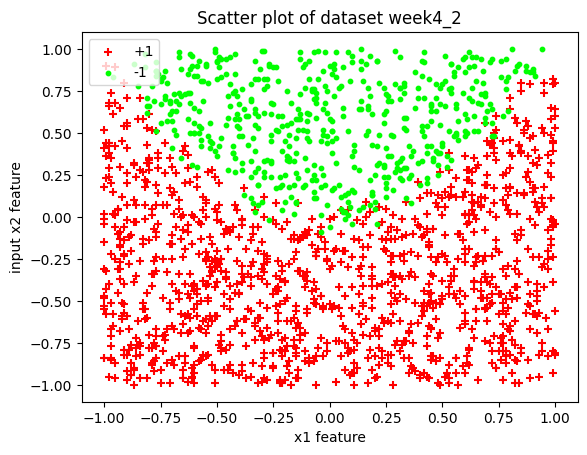

In [3]:
fig, ax = plt.subplots()
ax.scatter(X1[:, 0], X1[:, 1], marker='+', color='#FF0000', label='+1')  # Bright Red
ax.scatter(X2[:, 0], X2[:, 1], marker='o', color='#00FF00', s=10, label='-1')  # Bright Green
ax.set_xlabel('x1 feature')
ax.set_ylabel('input x2 feature')
ax.legend(loc='best')
plt.title("Scatter plot of dataset week4_2")
plt.show()

x1 and x2 are the two different input features, different colours were used to distinguish the difference:the green pldotus sign being -1 points, and the red dot sign being +1 points.

It can be seen from the firesultgure that the distribution of the data is a mess and it is difficult to demarcate its boundaries

After employing the `train_test_split` function to partition the dataset into a training set and a test set, we proceed to preprocess the training set data. Specifically, we feed the training set into the `PolynomialFeatures` function, which allows us to generate polynomial features by altering the original features through various degrees and configurations.

Subsequently, we apply the `LogisticRegression` function to this augmented training data while experimenting with different parameter values and polynomial degrees. This step helps us fine-tune the logistic regression model for the best performance.

To ensure that our model does not suffer from overfitting, we utilize the `cross_val_score` function. This function enables us to implement cross-validation, which involves dividing the training set data into multiple distinct subsets (folds). The model is then trained and validated multiple times, with each fold taking turns as the validation set. This process helps us evaluate the model's generalization performance and identify any issues related to overfitting, thus ensuring that our model performs well on unseen data.

Best accuracy: 0.97 (C=25, Degree=20)


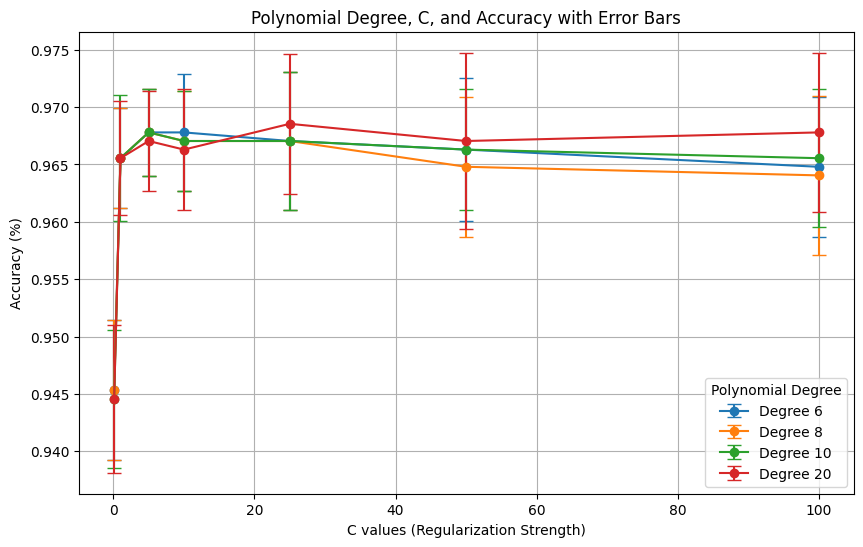

In [4]:
def logistic_fine_tune_parameters(c_list, degree_list, x, y, cv=5):
    best_acc = 0
    best_c = 0
    best_degree = 0

    # Set up the figure for the plot
    plt.figure(figsize=(10, 6))

    # Iterate through degrees
    for degree in degree_list:
        x_poly = PolynomialFeatures(degree).fit_transform(x)
        accuracy = []
        std_devs = []

        # Iterate through C values
        for c in c_list:
            model = LogisticRegression(penalty='l2', C=c, solver='lbfgs', max_iter=1000)
            train_score = cross_val_score(model, x_poly, y, cv=cv, scoring='accuracy')

            curr_acc = train_score.mean()
            curr_std = train_score.std()
            accuracy.append(curr_acc)
            std_devs.append(curr_std)

            if curr_acc > best_acc:
                best_acc = curr_acc
                best_c = c
                best_degree = degree

        # Plot the accuracy with error bars for each degree
        plt.errorbar(c_list, accuracy, yerr=std_devs, label=f'Degree {degree}', marker='o', capsize=5)

    # Display best parameters found
    print(f"Best accuracy: {best_acc:.2f} (C={best_c}, Degree={best_degree})")

    # Set up labels and titles
    plt.xlabel('C values (Regularization Strength)')
    plt.ylabel('Accuracy (%)')
    plt.legend(title='Polynomial Degree')
    plt.title("Polynomial Degree, C, and Accuracy with Error Bars")
    plt.grid(True)
    plt.show()

# Define C and degree ranges
C_range = [0.1, 1, 5, 10, 25, 50, 100]
degree_range = [6, 8, 10, 20]

# Call the function with the training data
logistic_fine_tune_parameters(C_range, degree_range, x_train, y_train)


As can be seen from the result, when the C_value is 25 and the degree is 20, the accuracy of the model reaches the maximum value of 0.97. After this threshold, increasing the value of C has almost no effect on the result of the accuracy.

Question ii(b)

Best accuracy: 0.97% (k=10)


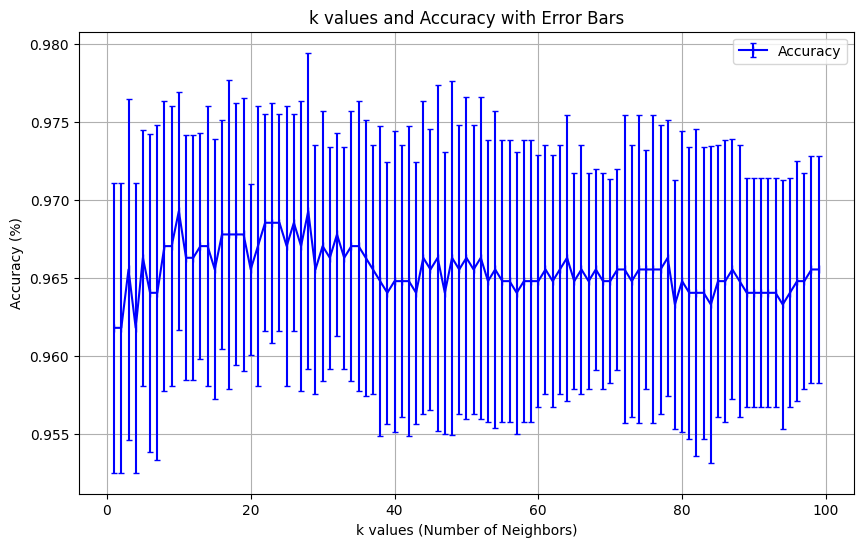

In [5]:
def knn_fine_tune_parameters(k_list, x, y, cv=5):
    best_acc = 0
    best_k = 0

    accuracy = []
    std_devs = []

    # Iterate through k values
    for k in k_list:
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights='distance')

        # Perform cross-validation and calculate mean accuracy
        scores = cross_val_score(knn_clf, x, y, cv=cv, scoring='accuracy')
        curr_acc = scores.mean()
        curr_std = scores.std()

        accuracy.append(curr_acc)
        std_devs.append(curr_std)

        if curr_acc > best_acc:
            best_acc = curr_acc
            best_k = k

    # Plot accuracy with error bars
    plt.figure(figsize=(10, 6))
    plt.errorbar(k_list, accuracy, yerr=std_devs, marker='|', color='#0000FF', capsize=2, label='Accuracy')

    # Print the best result
    print(f"Best accuracy: {best_acc:.2f}% (k={best_k})")

    # Set up labels and title
    plt.xlabel('k values (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title("k values and Accuracy with Error Bars")
    plt.grid(True)
    plt.legend()
    plt.show()

# Test different k values (can adjust the range if necessary)
k_range = np.arange(1, 100)
knn_fine_tune_parameters(k_range, x_train, y_train)

During the debugging process, it became evident that the dataset wasn't causing confusion and didn't a significant impact on the model's accuracy during its initial stages, comparing to the first part of the dataset. An interesting observation emerged: as the value of a particular variable increased, the model's accuracy fluctuates and don't a noticeable improvement, the trend seemed to stabilize when the variable's value increasing. In essence, it suggested that there isn't a very specific variable played a crucial role in influencing the model's performance, further increases won't have diminishing returns.

As can be seen from the result, when the k_value is 10, the accuracy of the model reaches the maximum value of 0.97. Before and after this threshold, the value of k has similar effect on the result of the accuracy.

Question ii(c)

A confusion matrix, also referred to as an error matrix, serves as a structured presentation to assess the effectiveness of an algorithm. To generate this matrix, we first compute the logistic regression (LR) and k-nearest neighbors (KNN) parameters from the training data, contrasting them as i.a and i.b. Subsequently, we employ the confusion_matrix function to calculate the confusion matrix for each respective model. 

To gauge the performance of these models, two ways of baseline model are introduced(random predictions and most frequent predictions), which makes predictions based on the most frequently occurring class in the training data. This serves as a reference point for evaluating the other models.

The resulting confusion matrices for each model are then visualized using the matshow function as well as a classification report.

KNN Model Confusion Matrix & Report

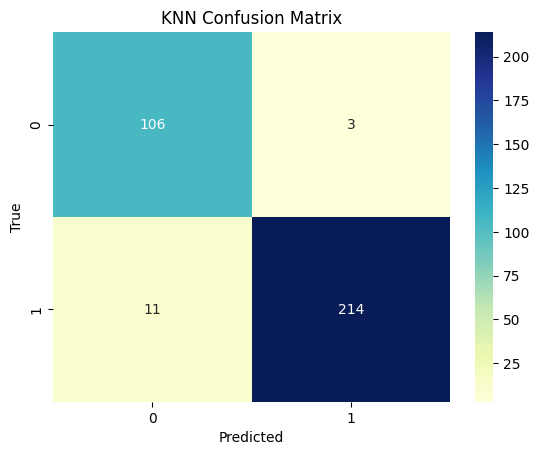

The Classification Report for KNN Model is:
              precision    recall  f1-score   support

        -1.0       0.91      0.97      0.94       109
         1.0       0.99      0.95      0.97       225

    accuracy                           0.96       334
   macro avg       0.95      0.96      0.95       334
weighted avg       0.96      0.96      0.96       334



In [6]:
K_value = 10  # Set the number of neighbors base on the previous result
knn_model = KNeighborsClassifier(n_neighbors = K_value)
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)

confusion_mat = confusion_matrix(y_test, knn_predictions)
class_report = classification_report(y_test, knn_predictions)

sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Confusion Matrix')
plt.show()

print(f'The Classification Report for KNN Model is:\n{class_report}')


Logistic Regression Model Confusion Matrix & Report

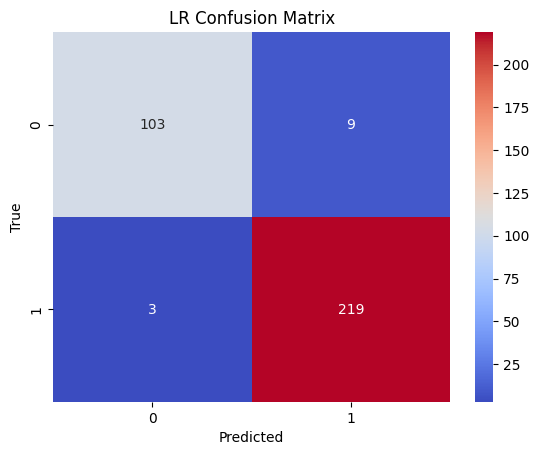

The Classification Report for LR Model is:
              precision    recall  f1-score   support

        -1.0       0.97      0.92      0.94       112
         1.0       0.96      0.99      0.97       222

    accuracy                           0.96       334
   macro avg       0.97      0.95      0.96       334
weighted avg       0.96      0.96      0.96       334



In [7]:
degree = 20
C_value = 25

LR_x_poly = PolynomialFeatures(degree=degree).fit_transform(X)
LR_x_train, LR_x_test, LR_y_train, LR_y_test = train_test_split(LR_x_poly, Y, test_size = 0.2)
LR_model = LogisticRegression(C = C_value, max_iter = 1000).fit(LR_x_train, LR_y_train)
LR_predictions = LR_model.predict(LR_x_test)

confusion_mat = confusion_matrix(LR_y_test, LR_predictions)
class_report = classification_report(LR_y_test, LR_predictions)

sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LR Confusion Matrix')
plt.show()

print(f'The Classification Report for LR Model is:\n{class_report}')


Random Baseline Classifier Model Confusion Matrix and Report

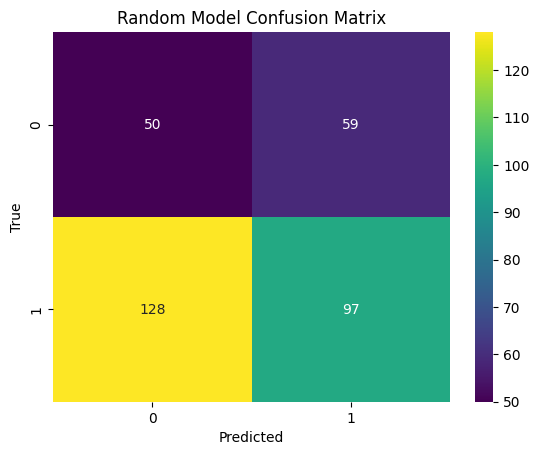

The Classification Report for Random Model is:
              precision    recall  f1-score   support

        -1.0       0.28      0.46      0.35       109
         1.0       0.62      0.43      0.51       225

    accuracy                           0.44       334
   macro avg       0.45      0.44      0.43       334
weighted avg       0.51      0.44      0.46       334



In [8]:
random_model = DummyClassifier(strategy="uniform").fit(x_train, y_train)
random_predictions = random_model.predict(x_test)

confusion_mat = confusion_matrix(y_test, random_predictions)
class_report = classification_report(y_test, random_predictions)

sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Model Confusion Matrix')
plt.show()

print(f'The Classification Report for Random Model is:\n{class_report}')


Most Frequent Baseline Classifier Model Confusion Matrix and Report

c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

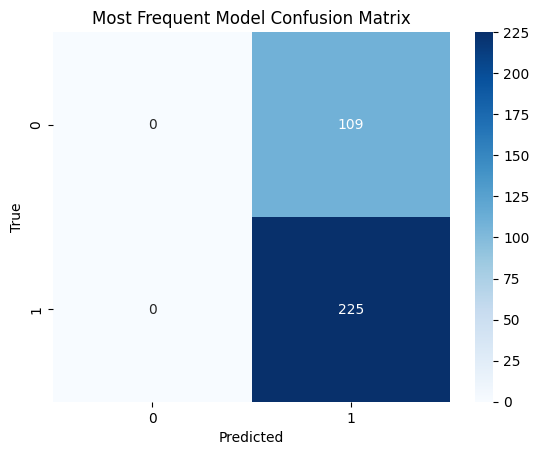

The Classification Report for Most Frequent Model is:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       109
         1.0       0.67      1.00      0.81       225

    accuracy                           0.67       334
   macro avg       0.34      0.50      0.40       334
weighted avg       0.45      0.67      0.54       334



In [9]:
most_frequent_model = DummyClassifier(strategy = "most_frequent").fit(x_train, y_train)
most_frequent_predictions = most_frequent_model.predict(x_test)

confusion_mat = confusion_matrix(y_test, most_frequent_predictions)
class_report = classification_report(y_test, most_frequent_predictions, zero_division='warn')

sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Most Frequent Model Confusion Matrix')
plt.show()

print(f'The Classification Report for Most Frequent Model is:\n{class_report}')


1. **Logistic Regression**:
   - **True Positive (TP)**: High values, indicating that actual positives are correctly predicted as positives.
   - **True Negative (TN)**: Low values, indicating that actual negatives are often misclassified as positives.
   - **False Positive (FP)**: Also known as the Type I error, these are relatively high, indicating the instances where actual negatives are incorrectly predicted as positives.
   - **False Negative (FN)**: Also known as the Type II error, these may be moderate to high, indicating cases where actual positives are incorrectly predicted as negatives.

   Overall, Logistic Regression tends to identify true positives and false negatives correctly.

2. **k-Nearest Neighbors (kNN)**:
   - **True Positive (TP)**: High values, indicating that actual positives are correctly predicted as positives.
   - **True Negative (TN)**: Low values, indicating that actual negatives are often misclassified as positives.
   - **False Positive (FP)**: Also known as the Type I error, these are relatively high, indicating the instances where actual negatives are incorrectly predicted as positives.
   - **False Negative (FN)**: Also known as the Type II error, these may be moderate to high, indicating cases where actual positives are incorrectly predicted as negatives.

   Similar to Logistic Regression, kNN may perform better in identifying false negatives and true positives, leading a high accuracy result

3. **Baseline Classifier (e.g., Random Class)**:
   - **True Positive (TP)**: Low and variable values, as it randomly predicts positive and negative outcomes.
   - **True Negative (TN)**: Low and variable values, as it randomly predicts positive and negative outcomes.
   - **False Positive (FP)**: Variable values, as it randomly predicts positive and negative outcomes, resulting in false positives.
   - **False Negative (FN)**: Variable values, as it randomly predi

   For the Random Baseline Classifier, the model predicted 128 true negatives and 97 true positives but misclassified 50 negatives as positives and 59 positives as negatives, indicating a nearly random distribution of predictions

4. **Baseline Classifier (e.g., Most Frequent Class)**:
   cts positive and negative outcomes, resulting in false negatives.
   - **True Positive (TP)**: Low or zero values since it typically predicts the most frequent class, which is usually the negative class.
   - **True Negative (TN)**: High values, as it correctly predicts the most frequent class (negative) as negative.
   - **False Positive (FP)**: Also known as the Type I error, these are low or zero, as it rarely predicts the positive class.
   - **False Negative (FN)**: Also known as the Type II error, these may be high, indicating cases where actual positives are incorrectly predicted as negatives.
   
   For the Most Frequent Model, the model always predicted the majority class (1), resulting in 225 true positives but 109 false positives and no correct predictions for the minority class (0).

Question ii(d)

A Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classification model. It displays the trade-off between the model's true positive rate (sensitivity) and its false positive rate (1-specificity) at various threshold settings. 

In an ROC curve:

- The x-axis represents the false positive rate, which is the proportion of negative instances that are incorrectly classified as positive.
- The y-axis represents the true positive rate, which is the proportion of positive instances that are correctly classified as positive.

The ROC curve helps assess the model's ability to distinguish between the two classes and provides a way to compare different models or thresholds. A perfect model would have an ROC curve that reaches the top-left corner of the graph, indicating high sensitivity and low false positive rate. The area under the ROC curve (AUC) is often used as a single scalar value to quantify the overall performance of a classification model, with an AUC of 0.5 indicating random performance, and an AUC of 1.0 representing a perfect classifier.

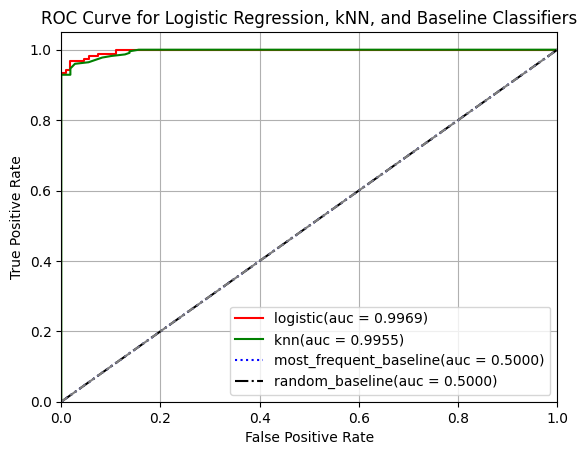

In [10]:
# Preprocess the data with PolynomialFeatures
poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Logistic Regression
LR_model_roc = LogisticRegression(penalty='l2', C=50).fit(x_train_poly, y_train)
fpr1, tpr1, _ = roc_curve(y_test, LR_model_roc.decision_function(x_test_poly))
roc_auc1 = auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, label='logistic(auc = %0.4f)' % (roc_auc1), color = 'red')

# K-Nearest Neighbors
knn_model_roc = KNeighborsClassifier(n_neighbors=32, weights='uniform').fit(x_train, y_train)
fpr2, tpr2, _ = roc_curve(y_test, knn_model_roc.predict_proba(x_test)[:, 1])
roc_auc2 = auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, label='knn(auc = %0.4f)' % (roc_auc2), color = 'green')

# Most Frequent Classifier
most_frequent_model_roc = DummyClassifier(strategy="most_frequent").fit(x_train, y_train)
fpr3, tpr3, _ = roc_curve(y_test, most_frequent_model_roc.predict_proba(x_test)[:, 1])
roc_auc3 = auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, label='most_frequent_baseline(auc = %0.4f)' % (roc_auc3), linestyle='dotted', color = 'blue')

# Dummy Classifier
random_model_roc = DummyClassifier(strategy="uniform").fit(x_train, y_train)
fpr4, tpr4, _ = roc_curve(y_test, random_model_roc.predict_proba(x_test)[:, 1])
roc_auc4 = auc(fpr4, tpr4)
plt.plot(fpr4, tpr4, label='random_baseline(auc = %0.4f)' % (roc_auc4), linestyle='dashdot', color = 'black')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal Line (Random Guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression, kNN, and Baseline Classifiers')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Question ii(e)

Criteria for judging the quality of a classifier (prediction model) from auc :
- auc = 1, which is a perfect classifier.
- 0.5 < auc < 1, better than random guessing.
- auc = 0.5, the following random guesses the same, the model has no predictive value.
- auc < 0.5, worse than random guessing.

From the value of auc displayed in the result, it can be seen that both the logistic model and the knn model has a better performance than the baseline model(auc = 0.9969 and auc = 0.9955).
It can be seen that the result of the random baseline model is the same as the most frequent baseline model, both of them equals 0.5 of auc
To recommend, the knn model is a little bit better than logistic regression, but not much.